# 002_image_classification （2025-03-31）
- URLs.PETs (cats, dogs)
- ImageDataLoaders.from_name_func() #direct way
- vision_learner
- fine_tune

In [20]:
from fastai.vision.all import *

In [27]:
path = untar_data(URLs.PETS)/'images' #must be 'images' folder

In [29]:
def is_cat(x): return x[0].isupper()

In [30]:
dls = ImageDataLoaders.from_name_func('.', get_image_files(path), 
                                     valid_pct=0.2, seed=42, 
                                     label_func=is_cat,
                                     item_tfms=Resize(192))

In [31]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [32]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.199438,0.039474,0.013532,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.066937,0.030243,0.011502,00:31
1,0.038605,0.027371,0.009472,00:30
2,0.019263,0.023109,0.006766,00:30


# fastbook# 5_pet_breeds (补充)
## Regular expression

In [37]:
fname = (path).ls()[0]
fname

Path('/Users/applewang/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg')

In [46]:
re.findall(r'(.+)_\d+.jpg$', fname.name) #regular expression

['Egyptian_Mau']

In [43]:
fname.name

'Egyptian_Mau_167.jpg'

## DataBlock, dataloader

In [47]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_items=get_image_files,
                splitter=RandomSplitter(seed=42),
                get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                item_tfms=Resize(192))

In [48]:
dls = pets.dataloaders(path)

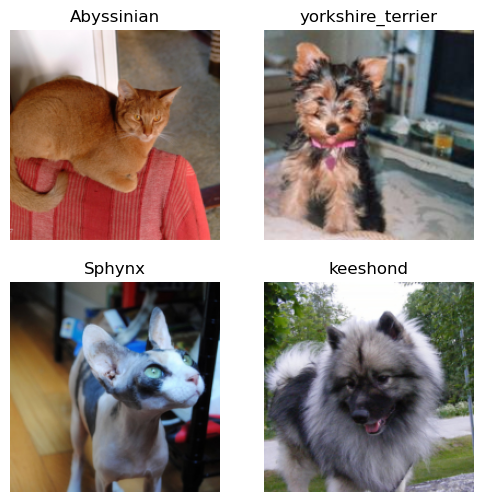

In [50]:
dls.show_batch(max_n=4)

In [52]:
pets.summary(path)

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /Users/applewang/.fastai/data/oxford-iiit-pet/images/saint_bernard_60.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=375x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /Users/applewang/.fastai/data/oxford-iiit-pet/images/saint_bernard_60.jpg
    applying partial gives
      saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30)

Final sample: (PILImage mode=RGB size=375x500, TensorCategory(30))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na

## Model interpretation

In [55]:
interp = ClassificationInterpretation.from_learner(learn)

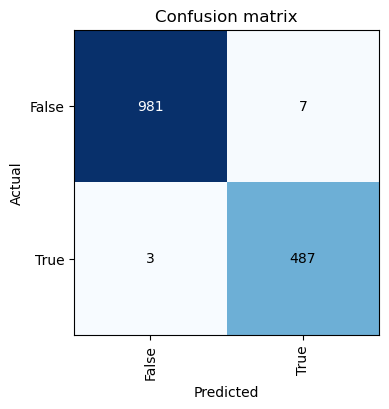

In [57]:
interp.plot_confusion_matrix(figsize=(4,4))

In [58]:
interp.most_confused(min_val=3)

[(False, True, 7), (True, False, 3)]

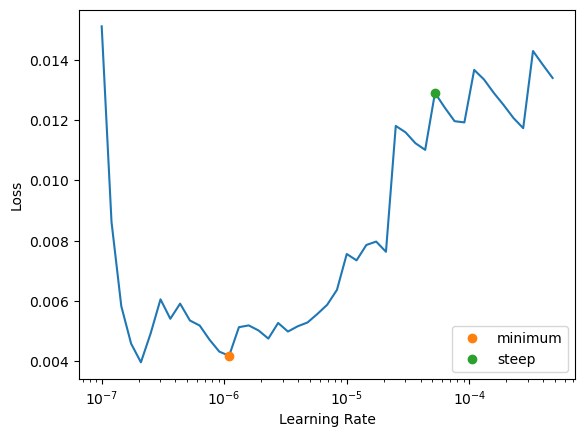

In [59]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [60]:
lr_min

1.0964781722577755e-07

In [61]:
lr_steep

5.248074739938602e-05

In [62]:
learn.fine_tune(3, 5e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.009934,0.021175,0.006089,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.017114,0.020602,0.007442,00:28
1,0.012262,0.020882,0.008119,00:28
2,0.010262,0.019637,0.007442,00:28
